In [19]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
# Call SQL query
def pysqldf(q):
    return sqldf(q, globals())

In [7]:
# Load test per day data
dftests = pd.read_csv('full-list-covid-19-tests-per-day.csv',
                      header=0, names=['country', 'code', 'date', 'tests'],
                      dtype={'country': str, 'code': str, 'date':object, 'tests': float},
                      parse_dates=True)
dftests.head()

,country,code,date,tests
0,Argentina,ARG,"Apr 9, 2020",1520.0
1,Argentina,ARG,"Apr 10, 2020",1529.0
2,Argentina,ARG,"Apr 11, 2020",1648.0
3,Argentina,ARG,"Apr 14, 2020",3047.0
4,Argentina,ARG,"Apr 15, 2020",1569.0


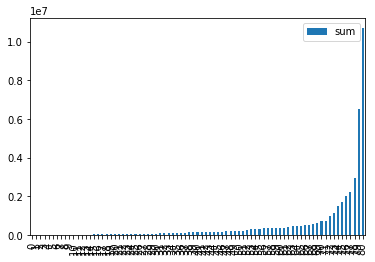

In [38]:
# Sum of tests by country
q = """
    SELECT country, SUM(tests) as 'sum'
    FROM dftests
    GROUP BY country
    ORDER BY sum
    """
df_sum_tests = pysqldf(q)
df_sum_tests.tail()

df_sum_tests.plot.bar()

In [12]:
# First day and last day of data for each country
q = """
    SELECT country, MIN(date), MAX(date)
    FROM dftests
    GROUP BY country
    """
pysqldf(q)

,country,MIN(date),MAX(date)
0,Argentina,"Apr 10, 2020","May 9, 2020"
1,Australia,"Apr 10, 2020","May 9, 2020"
2,Austria,"Apr 1, 2020","May 9, 2020"
3,Bahrain,"Apr 10, 2020","May 9, 2020"
4,Bangladesh,"Apr 1, 2020","May 9, 2020"
5,Belarus,"Apr 1, 2020","May 9, 2020"
6,Belgium,"Apr 1, 2020","May 9, 2020"
7,Bolivia,"Apr 1, 2020","May 9, 2020"
8,Bulgaria,"May 10, 2020","May 9, 2020"
9,Canada,"Apr 10, 2020","May 9, 2020"
